In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer   # clean medical dataset
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
df = pd.read_csv("heart.csv")

print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [3]:
X = df.drop("target", axis=1)
y = df["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

print("\nDecision Tree Accuracy:", dt_acc)


Decision Tree Accuracy: 0.9853658536585366


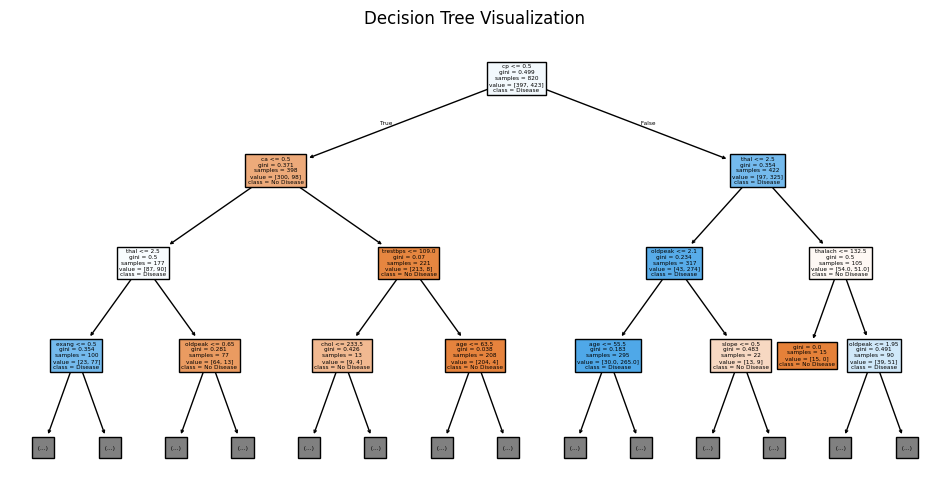

In [6]:
plt.figure(figsize=(12,6))
tree.plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No Disease","Disease"],
    filled=True,
    max_depth=3
)
plt.title("Decision Tree Visualization")
plt.show()

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_acc = accuracy_score(y_test, rf.predict(X_test))
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9853658536585366


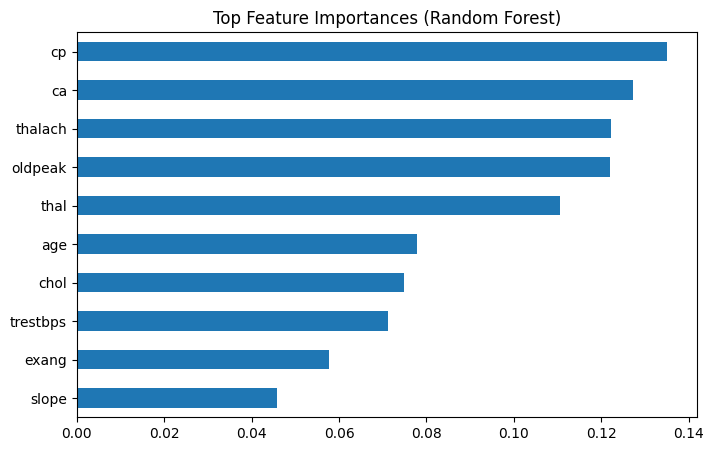

In [8]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.head(10).plot(kind="barh")
plt.title("Top Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [9]:
dt_cv = cross_val_score(dt, X, y, cv=5)
rf_cv = cross_val_score(rf, X, y, cv=5)

print("\nDecision Tree CV Accuracy:", dt_cv.mean())
print("Random Forest CV Accuracy:", rf_cv.mean())


Decision Tree CV Accuracy: 1.0
Random Forest CV Accuracy: 0.9970731707317073
